In [196]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR

In [37]:
Telco= pd.read_csv("telco x modeling data.csv")

In [38]:
Telco.head(100)

,customer_id,data_known,gender,age,tariff,dropped_calls,handset,peak_mins,peak_rate,bill_peak,...,gadget_A,gadget_B,gadget_C,gadget_D,gadget_A_revenues,gadget_B_revenues,gadget_C_revenues,gadget_D_revenues,churn,retention
0,K100010,yes,Male,46.0,CAT 50,1.0,SOP10,36.0,15.0,5.0,...,F,F,T,F,0.0,0.0,28.0,0.0,Churned,F
1,K100020,yes,Male,27.0,CAT 50,0.0,SOP10,39.0,15.0,6.0,...,T,F,F,F,11.0,0.0,0.0,0.0,Churned,F
2,K100030,yes,Male,39.0,CAT 50,2.0,SOP20,73.0,15.0,11.0,...,T,T,F,T,8.0,23.0,0.0,35.0,Churned,F
3,K100040,yes,Male,28.0,CAT 50,2.0,SOP10,73.0,15.0,11.0,...,T,T,F,T,13.0,18.0,0.0,41.0,Churned,F
4,K100050,yes,Male,47.0,CAT 50,0.0,SOP10,41.0,15.0,6.0,...,F,F,F,F,0.0,0.0,0.0,0.0,Churned,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,K100960,yes,Male,25.0,Play 100,0.0,SOP20,38.0,25.0,10.0,...,F,F,F,F,0.0,0.0,0.0,0.0,Churned,F
96,K100970,yes,Male,37.0,Play 100,1.0,SOP10,36.0,25.0,9.0,...,F,F,F,F,0.0,0.0,0.0,0.0,Churned,F
97,K100980,yes,Male,30.0,Play 100,2.0,SOP20,0.0,25.0,0.0,...,F,T,F,F,0.0,18.0,0.0,0.0,Churned,F
98,K100990,yes,Male,28.0,Play 100,1.0,SOP20,27.0,25.0,7.0,...,F,F,F,F,0.0,0.0,0.0,0.0,Churned,F


In [39]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31789 entries, 0 to 31788
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        31789 non-null  object 
 1   data_known         31789 non-null  object 
 2   gender             31769 non-null  object 
 3   age                31754 non-null  float64
 4   tariff             31769 non-null  object 
 5   dropped_calls      31769 non-null  float64
 6   handset            31769 non-null  object 
 7   peak_mins          31769 non-null  float64
 8   peak_rate          31769 non-null  float64
 9   bill_peak          31769 non-null  float64
 10  offpeak_mins       31769 non-null  float64
 11  offpeak_rate       31769 non-null  float64
 12  bill_offpeak       31769 non-null  float64
 13  gadget_A           31769 non-null  object 
 14  gadget_B           31769 non-null  object 
 15  gadget_C           31769 non-null  object 
 16  gadget_D           317

In [72]:
Telco=Telco.drop(['customer_id'], axis=1)

In [73]:
Telco

,data_known,gender,age,tariff,dropped_calls,handset,peak_mins,peak_rate,bill_peak,offpeak_mins,...,gadget_A,gadget_B,gadget_C,gadget_D,gadget_A_revenues,gadget_B_revenues,gadget_C_revenues,gadget_D_revenues,churn,retention
0,yes,Male,46.0,CAT 50,1.0,SOP10,36.0,15.0,5.0,8.0,...,F,F,T,F,0.0,0.0,28.0,0.0,Churned,F
1,yes,Male,27.0,CAT 50,0.0,SOP10,39.0,15.0,6.0,21.0,...,T,F,F,F,11.0,0.0,0.0,0.0,Churned,F
2,yes,Male,39.0,CAT 50,2.0,SOP20,73.0,15.0,11.0,28.0,...,T,T,F,T,8.0,23.0,0.0,35.0,Churned,F
3,yes,Male,28.0,CAT 50,2.0,SOP10,73.0,15.0,11.0,28.0,...,T,T,F,T,13.0,18.0,0.0,41.0,Churned,F
4,yes,Male,47.0,CAT 50,0.0,SOP10,41.0,15.0,6.0,19.0,...,F,F,F,F,0.0,0.0,0.0,0.0,Churned,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31784,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31785,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31786,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31787,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

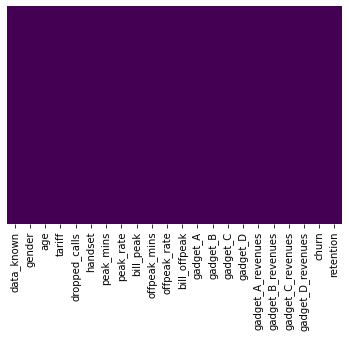

In [13]:
sns.heatmap(Telco1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
Telco1.isnull().sum()

data_known            0
gender               20
age                  35
tariff               20
dropped_calls        20
handset              20
peak_mins            20
peak_rate            20
bill_peak            20
offpeak_mins         20
offpeak_rate         20
bill_offpeak         20
gadget_A             20
gadget_B             20
gadget_C             20
gadget_D             20
gadget_A_revenues    20
gadget_B_revenues    20
gadget_C_revenues    20
gadget_D_revenues    20
churn                20
retention            20
dtype: int64

In [74]:
Telco.dropna(inplace=True)

In [177]:
Telco.corr()

,churn,retention,gender,age,tariff,dropped_calls,handset,peak_mins,peak_rate,bill_peak,...,offpeak_rate,bill_offpeak,gadget_A,gadget_B,gadget_C,gadget_D,gadget_A_revenues,gadget_B_revenues,gadget_C_revenues,gadget_D_revenues
churn,1.000000,-1.000000,0.042964,-0.124308,0.022971,0.158633,-0.184558,-0.035456,0.042547,-0.058419,...,0.072552,-0.054655,0.022131,0.024020,0.025451,0.020371,0.023167,0.022488,0.025470,0.020104
retention,-1.000000,1.000000,-0.042964,0.124308,-0.022971,-0.158633,0.184558,0.035456,-0.042547,0.058419,...,-0.072552,0.054655,-0.022131,-0.024020,-0.025451,-0.020371,-0.023167,-0.022488,-0.025470,-0.020104
gender,0.042964,-0.042964,1.000000,0.006156,0.001810,0.002581,-0.079125,-0.002965,0.003053,-0.003630,...,0.001270,-0.000249,-0.001720,0.005129,-0.000237,-0.005555,-0.000475,0.004119,0.000051,-0.005945
age,-0.124308,0.124308,0.006156,1.000000,-0.003912,-0.003206,0.075378,-0.000392,-0.001816,-0.000708,...,0.001113,0.002241,-0.002272,-0.012593,-0.006848,-0.006740,-0.004053,-0.011402,-0.007292,-0.007090
tariff,0.022971,-0.022971,0.001810,-0.003912,1.000000,0.009358,0.006061,-0.465142,0.800544,-0.313405,...,-0.665868,0.008752,-0.073385,-0.068215,-0.064766,-0.071605,-0.068657,-0.066840,-0.064430,-0.071450
dropped_calls,0.158633,-0.158633,0.002581,-0.003206,0.009358,1.000000,0.103464,-0.008057,0.012833,-0.003467,...,-0.006509,0.002232,0.052025,0.048262,0.052672,0.052579,0.047425,0.048304,0.052634,0.051446
handset,-0.184558,0.184558,-0.079125,0.075378,0.006061,0.103464,1.000000,-0.110911,0.058961,-0.102472,...,0.012924,-0.055405,-0.070059,-0.076769,-0.074721,-0.073962,-0.068110,-0.076186,-0.073922,-0.073670
peak_mins,-0.035456,0.035456,-0.002965,-0.000392,-0.465142,-0.008057,-0.110911,1.000000,-0.741697,0.915346,...,0.223581,0.197611,0.152438,0.161742,0.148317,0.159092,0.143504,0.158561,0.147059,0.159642
peak_rate,0.042547,-0.042547,0.003053,-0.001816,0.800544,0.012833,0.058961,-0.741697,1.000000,-0.522297,...,-0.520059,-0.139935,-0.131969,-0.134479,-0.124075,-0.133346,-0.123681,-0.132219,-0.123163,-0.133438
bill_peak,-0.058419,0.058419,-0.003630,-0.000708,-0.313405,-0.003467,-0.102472,0.915346,-0.522297,1.000000,...,-0.055763,0.132962,0.141120,0.147575,0.136673,0.147328,0.133486,0.144760,0.135717,0.147644


In [76]:
Telco['churn'].value_counts()

Active     17053
Churned    14701
Name: churn, dtype: int64

In [77]:
cols = Telco.columns.tolist()

In [78]:
cols

['data_known',
 'gender',
 'age',
 'tariff',
 'dropped_calls',
 'handset',
 'peak_mins',
 'peak_rate',
 'bill_peak',
 'offpeak_mins',
 'offpeak_rate',
 'bill_offpeak',
 'gadget_A',
 'gadget_B',
 'gadget_C',
 'gadget_D',
 'gadget_A_revenues',
 'gadget_B_revenues',
 'gadget_C_revenues',
 'gadget_D_revenues',
 'churn',
 'retention']

In [79]:
cols = cols[-2:] + cols[:-2]

In [80]:
Telco=Telco[cols]

In [112]:
Telco.drop([('gadget_A', 'gadget_B')], axis=1, inplace=True)

In [121]:
Telco

,churn,retention,gender,age,tariff,dropped_calls,handset,peak_mins,peak_rate,bill_peak,...,offpeak_rate,bill_offpeak,gadget_A,gadget_B,gadget_C,gadget_D,gadget_A_revenues,gadget_B_revenues,gadget_C_revenues,gadget_D_revenues
0,1,0,1,46.0,2,1.0,9,36.0,15.0,5.0,...,5.0,0.0,0,0,1,0,0.0,0.0,28.0,0.0
1,1,0,1,27.0,2,0.0,9,39.0,15.0,6.0,...,5.0,1.0,1,0,0,0,11.0,0.0,0.0,0.0
2,1,0,1,39.0,2,2.0,10,73.0,15.0,11.0,...,5.0,1.0,1,1,0,1,8.0,23.0,0.0,35.0
3,1,0,1,28.0,2,2.0,9,73.0,15.0,11.0,...,5.0,1.0,1,1,0,1,13.0,18.0,0.0,41.0
4,1,0,1,47.0,2,0.0,9,41.0,15.0,6.0,...,5.0,1.0,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31764,0,1,0,37.0,4,15.0,2,232.0,25.0,58.0,...,2.0,14.0,0,0,0,1,0.0,0.0,0.0,40.0
31765,1,0,0,45.0,4,14.0,7,647.0,25.0,162.0,...,2.0,13.0,1,1,1,1,12.0,20.0,31.0,43.0
31766,1,0,0,13.0,4,14.0,7,239.0,25.0,60.0,...,2.0,10.0,1,0,1,0,13.0,0.0,32.0,0.0
31767,1,0,0,45.0,4,12.0,4,173.0,25.0,43.0,...,2.0,13.0,1,0,1,1,8.0,0.0,29.0,37.0


In [115]:
led=LabelEncoder()
Telco['churn']=led.fit_transform(Telco['churn'])
Telco['retention']=led.fit_transform(Telco['retention'])
Telco['gender']=led.fit_transform(Telco['gender'])
Telco['tariff']=led.fit_transform(Telco['tariff'])
Telco['handset']=led.fit_transform(Telco['handset'])
Telco["gadget_A"]=led.fit_transform(Telco['gadget_A'])
Telco["gadget_B"]=led.fit_transform(Telco['gadget_B'])
Telco["gadget_C"]=led.fit_transform(Telco['gadget_C'])
Telco["gadget_D"]=led.fit_transform(Telco['gadget_D'])


In [178]:
Telco.head()

,churn,retention,gender,age,tariff,dropped_calls,handset,peak_mins,peak_rate,bill_peak,...,offpeak_rate,bill_offpeak,gadget_A,gadget_B,gadget_C,gadget_D,gadget_A_revenues,gadget_B_revenues,gadget_C_revenues,gadget_D_revenues
0,1,0,1,46.0,2,1.0,9,36.0,15.0,5.0,...,5.0,0.0,0,0,1,0,0.0,0.0,28.0,0.0
1,1,0,1,27.0,2,0.0,9,39.0,15.0,6.0,...,5.0,1.0,1,0,0,0,11.0,0.0,0.0,0.0
2,1,0,1,39.0,2,2.0,10,73.0,15.0,11.0,...,5.0,1.0,1,1,0,1,8.0,23.0,0.0,35.0
3,1,0,1,28.0,2,2.0,9,73.0,15.0,11.0,...,5.0,1.0,1,1,0,1,13.0,18.0,0.0,41.0
4,1,0,1,47.0,2,0.0,9,41.0,15.0,6.0,...,5.0,1.0,0,0,0,0,0.0,0.0,0.0,0.0


In [187]:
Telco.corr()

,churn,retention,gender,age,tariff,dropped_calls,handset,peak_mins,peak_rate,bill_peak,...,offpeak_rate,bill_offpeak,gadget_A,gadget_B,gadget_C,gadget_D,gadget_A_revenues,gadget_B_revenues,gadget_C_revenues,gadget_D_revenues
churn,1.000000,-1.000000,0.042964,-0.124308,0.022971,0.158633,-0.184558,-0.035456,0.042547,-0.058419,...,0.072552,-0.054655,0.022131,0.024020,0.025451,0.020371,0.023167,0.022488,0.025470,0.020104
retention,-1.000000,1.000000,-0.042964,0.124308,-0.022971,-0.158633,0.184558,0.035456,-0.042547,0.058419,...,-0.072552,0.054655,-0.022131,-0.024020,-0.025451,-0.020371,-0.023167,-0.022488,-0.025470,-0.020104
gender,0.042964,-0.042964,1.000000,0.006156,0.001810,0.002581,-0.079125,-0.002965,0.003053,-0.003630,...,0.001270,-0.000249,-0.001720,0.005129,-0.000237,-0.005555,-0.000475,0.004119,0.000051,-0.005945
age,-0.124308,0.124308,0.006156,1.000000,-0.003912,-0.003206,0.075378,-0.000392,-0.001816,-0.000708,...,0.001113,0.002241,-0.002272,-0.012593,-0.006848,-0.006740,-0.004053,-0.011402,-0.007292,-0.007090
tariff,0.022971,-0.022971,0.001810,-0.003912,1.000000,0.009358,0.006061,-0.465142,0.800544,-0.313405,...,-0.665868,0.008752,-0.073385,-0.068215,-0.064766,-0.071605,-0.068657,-0.066840,-0.064430,-0.071450
dropped_calls,0.158633,-0.158633,0.002581,-0.003206,0.009358,1.000000,0.103464,-0.008057,0.012833,-0.003467,...,-0.006509,0.002232,0.052025,0.048262,0.052672,0.052579,0.047425,0.048304,0.052634,0.051446
handset,-0.184558,0.184558,-0.079125,0.075378,0.006061,0.103464,1.000000,-0.110911,0.058961,-0.102472,...,0.012924,-0.055405,-0.070059,-0.076769,-0.074721,-0.073962,-0.068110,-0.076186,-0.073922,-0.073670
peak_mins,-0.035456,0.035456,-0.002965,-0.000392,-0.465142,-0.008057,-0.110911,1.000000,-0.741697,0.915346,...,0.223581,0.197611,0.152438,0.161742,0.148317,0.159092,0.143504,0.158561,0.147059,0.159642
peak_rate,0.042547,-0.042547,0.003053,-0.001816,0.800544,0.012833,0.058961,-0.741697,1.000000,-0.522297,...,-0.520059,-0.139935,-0.131969,-0.134479,-0.124075,-0.133346,-0.123681,-0.132219,-0.123163,-0.133438
bill_peak,-0.058419,0.058419,-0.003630,-0.000708,-0.313405,-0.003467,-0.102472,0.915346,-0.522297,1.000000,...,-0.055763,0.132962,0.141120,0.147575,0.136673,0.147328,0.133486,0.144760,0.135717,0.147644


In [119]:
Telco["offpeak_mins"]

0          8.0
1         21.0
2         28.0
3         28.0
4         19.0
         ...  
31764    713.0
31765    654.0
31766    515.0
31767    651.0
31768    481.0
Name: offpeak_mins, Length: 31754, dtype: float64

In [ ]:
Telco['tariff'].value_counts()

In [118]:
Telco.columns

Index(['churn', 'retention', 'gender', 'age', 'tariff', 'dropped_calls',
       'handset', 'peak_mins', 'peak_rate', 'bill_peak', 'offpeak_mins',
       'offpeak_rate', 'bill_offpeak', 'gadget_A', 'gadget_B', 'gadget_C',
       'gadget_D', 'gadget_A_revenues', 'gadget_B_revenues',
       'gadget_C_revenues', 'gadget_D_revenues'],
      dtype='object')

In [117]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31754 entries, 0 to 31768
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn              31754 non-null  int64  
 1   retention          31754 non-null  int64  
 2   gender             31754 non-null  int64  
 3   age                31754 non-null  float64
 4   tariff             31754 non-null  int64  
 5   dropped_calls      31754 non-null  float64
 6   handset            31754 non-null  int64  
 7   peak_mins          31754 non-null  float64
 8   peak_rate          31754 non-null  float64
 9   bill_peak          31754 non-null  float64
 10  offpeak_mins       31754 non-null  float64
 11  offpeak_rate       31754 non-null  float64
 12  bill_offpeak       31754 non-null  float64
 13  gadget_A           31754 non-null  int64  
 14  gadget_B           31754 non-null  int64  
 15  gadget_C           31754 non-null  int32  
 16  gadget_D           317

In [120]:
Telco.isnull().sum()

churn                0
retention            0
gender               0
age                  0
tariff               0
dropped_calls        0
handset              0
peak_mins            0
peak_rate            0
bill_peak            0
offpeak_mins         0
offpeak_rate         0
bill_offpeak         0
gadget_A             0
gadget_B             0
gadget_C             0
gadget_D             0
gadget_A_revenues    0
gadget_B_revenues    0
gadget_C_revenues    0
gadget_D_revenues    0
dtype: int64

In [188]:
X_train, X_test, y_train, y_test = train_test_split(Telco.drop(['churn','retention'],axis=1),Telco['churn'], test_size=0.2, random_state=1)

In [189]:
tdtc = tree.DecisionTreeClassifier()
tdtc.fit(X_train, y_train)
tdtc.score(X_test, y_test)

0.8354589828373484

In [190]:
model=SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5819555975436939

In [192]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logmodel.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6104550464493781

In [191]:
linmodel= LinearRegression()
linmodel.fit(X_train , y_train)
linmodel.score(X_test, y_test)

0.08580410786676018

In [193]:
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors=8)
KNN.fit(X_train , y_train)
KNN.score(X_test, y_test)

0.5929774838608093

In [194]:
from sklearn.cluster import KMeans
KM =  KMeans(n_clusters=8)
KM.fit(X_train, y_train)
KM.score(X_test, y_test)

-210022784.81232277

In [206]:
model2= RandomForestClassifier(n_estimators=30, random_state=1)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8910407809793733

In [207]:
model3= SVR()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

-0.03845122570484549

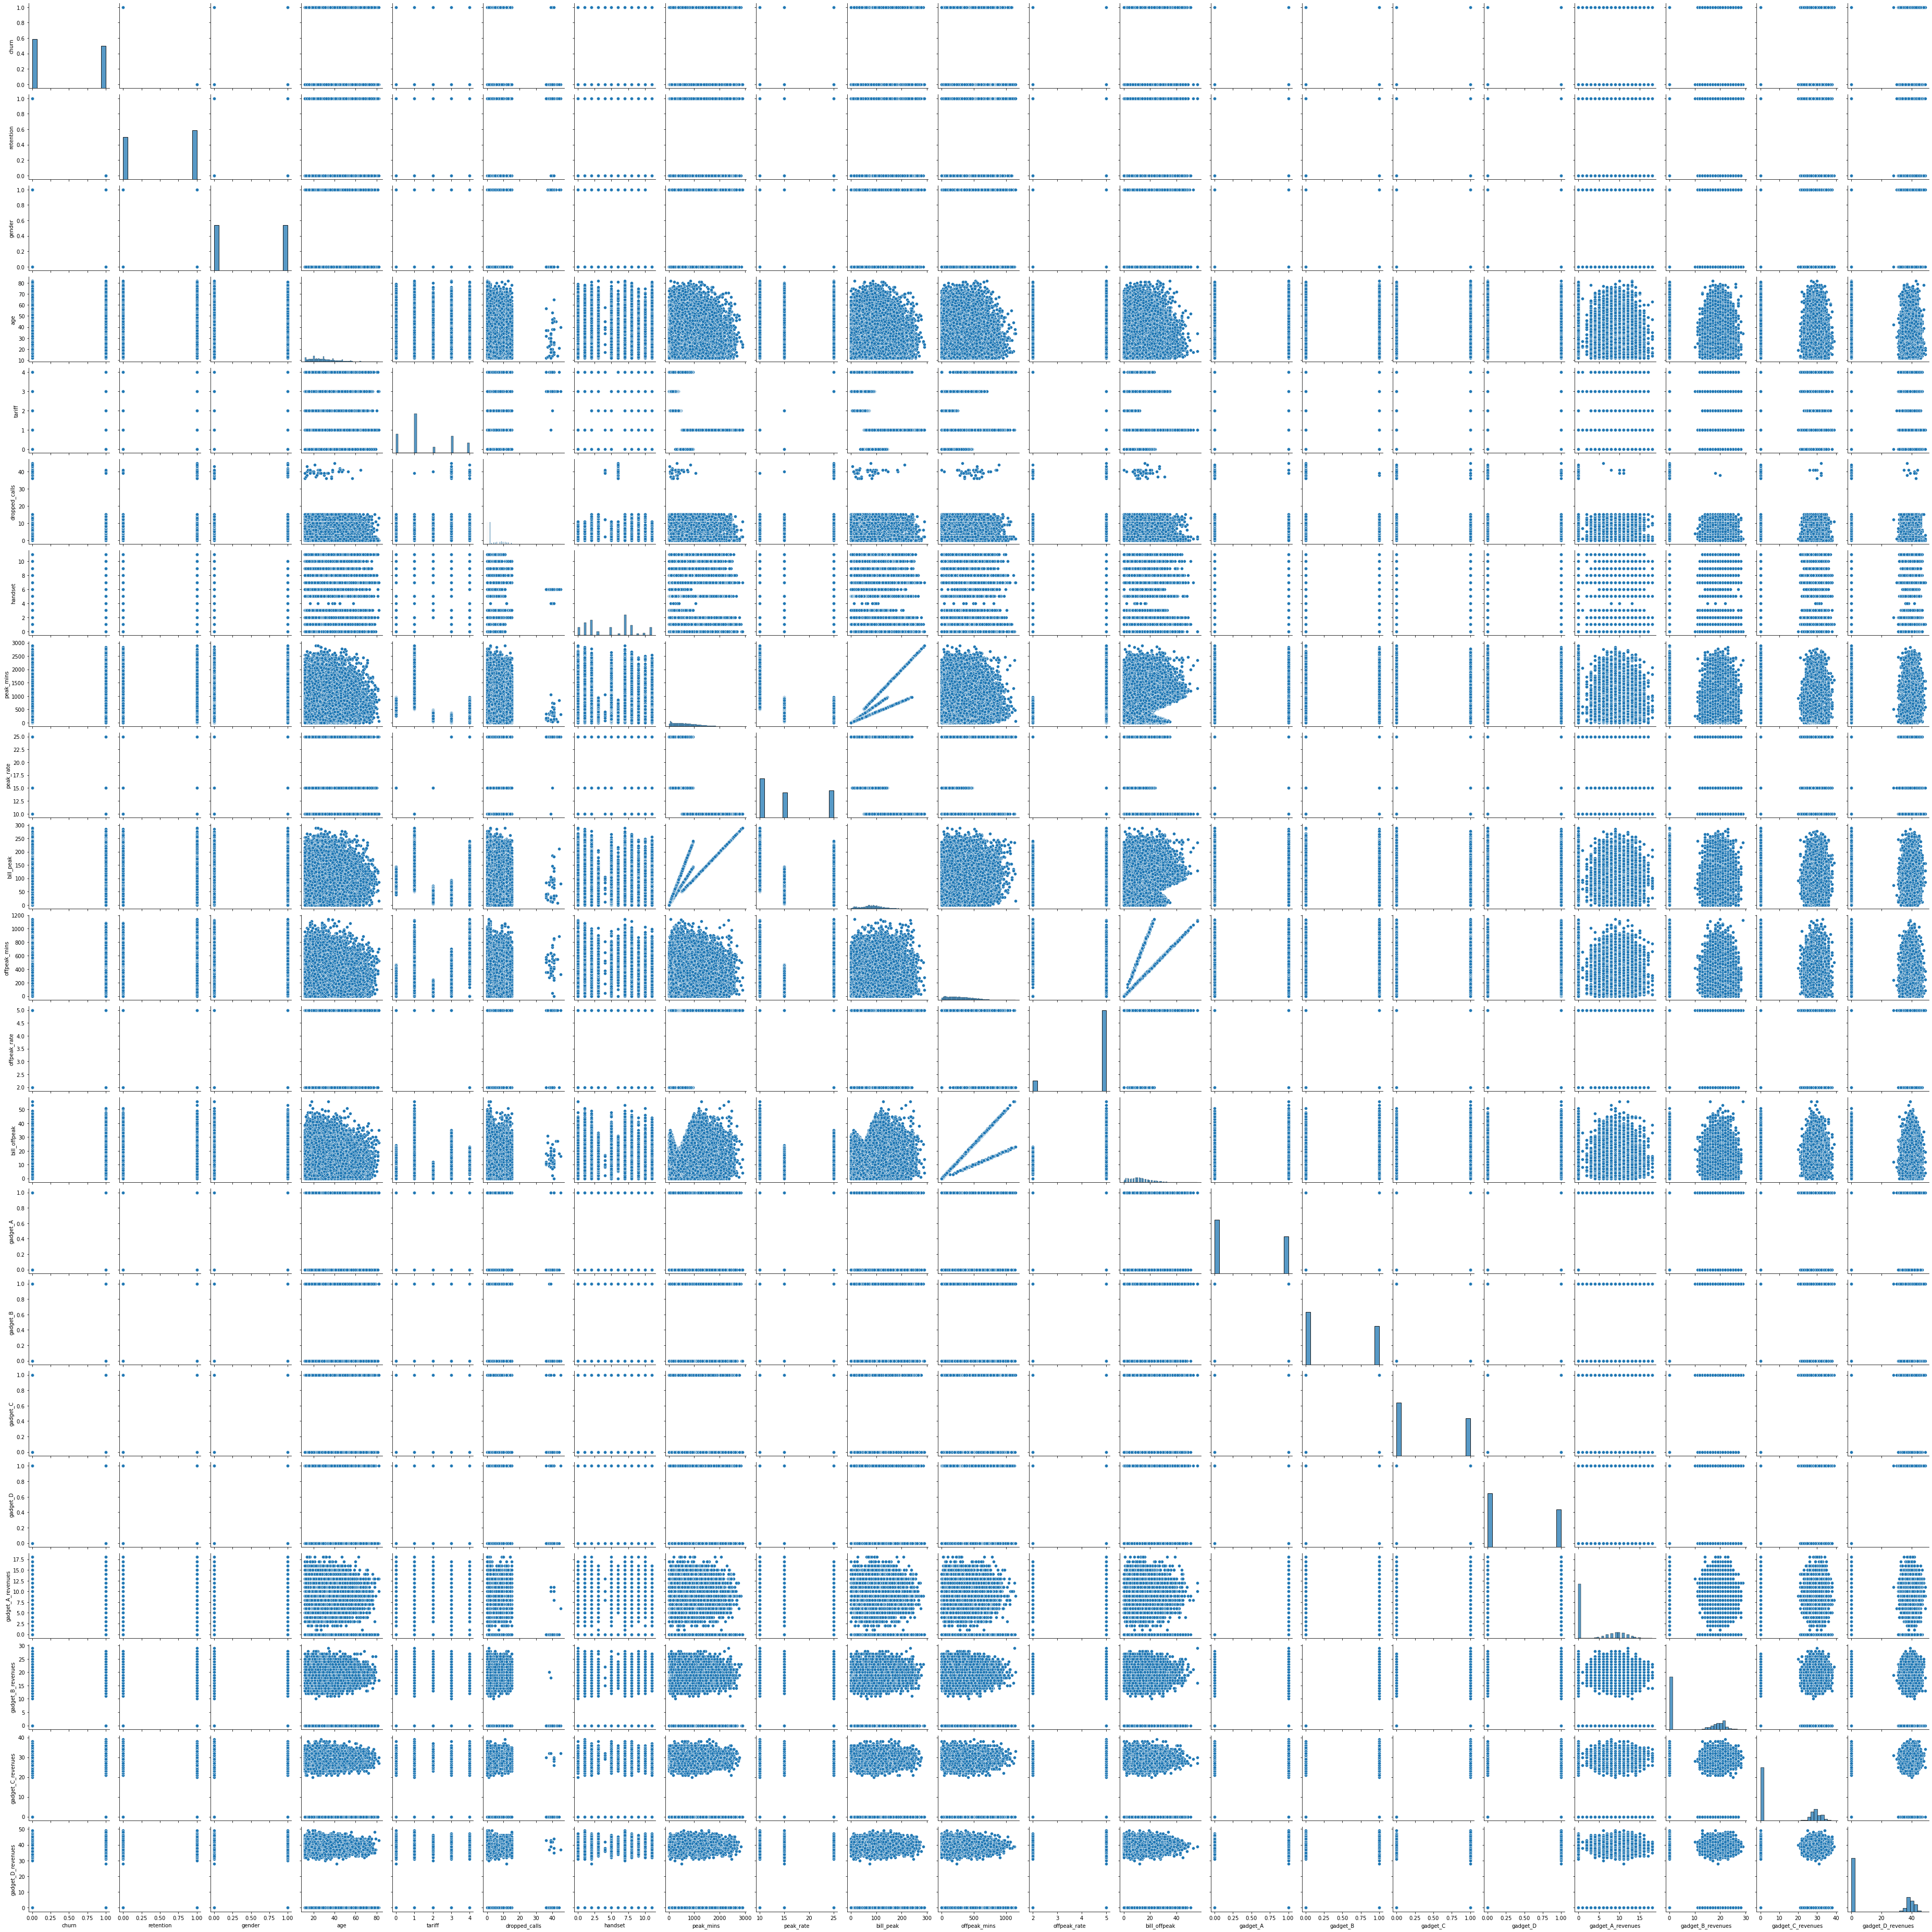

In [195]:
sns.pairplot(Telco)